# Übungsblatt 2
--------
## **Aufgabe 5: Graphische Darstellung Plancksches Strahlungsgesetz**
1. Zeichnen Sie mit Python die spektrale Intensitätsverteilung des schwarzen Strahlers,
also das Plancksche Strahlungsgesetz, für die Temperaturen 1000K, 1500K, 2000K und
2500K im Wellenlängenbereich bis 9 µm.
2. Zeichnen Sie auch das Rayleigh-Jeans-Gesetz für 2000K in das Diagramm.

Das Plancksche Strahlungsgesetz lautet:
$ \rho(\lambda) = \dfrac{8\pi hc}{\lambda^5}\dfrac{1}{e^{\frac{hc}{kt\lambda}}} $

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const


In [15]:
def planckGesetzt(lda, T):
    """Berechnet das Planksche Strahlungsgesetzt aus:

    Keyword arguments:
    lda -- Wellenlänge lambda in Meter
    T -- Temperatur in Kelvin
    """
    return( (8 * np.pi * const.h * const.c) / (lda ** 5) * 1/(np.exp((const.h * const.c / (const.k * T * lda))) - 1))

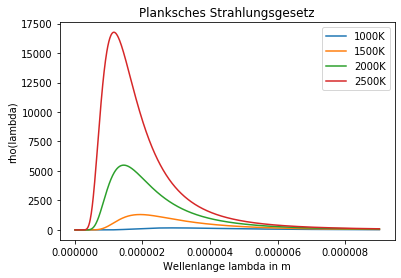

In [16]:
# Wellenlängen bis 9µm
lda = np.arange(0,9.02e-6,0.01e-6)
Temp  = (1000,1500,2000,2500)
#Plotten Planck
for T in Temp:
    plt.plot(lda,planckGesetzt(lda,T), label= str (T) + "K")

#Labeling etc
plt.legend()
plt.title("Planksches Strahlungsgesetz")
plt.xlabel("Wellenlange lambda in m")
plt.ylabel("rho(lambda)")
plt.show()

Rayleigh-Jeans-Gesetzt einfügen: $\dfrac{8\pi k T}{\lambda^4}$

In [17]:
def RayleighJeans(lda, T):
    """Berechnet das Raigleigh-Jeans Strahlungsgesetzt aus:

    Keyword arguments:
    lda -- Wellenlänge lambda in Meter
    T -- Temperatur in Kelvin
    """
   
    return( (8 * np.pi * const.k * T) / (lda ** 4))

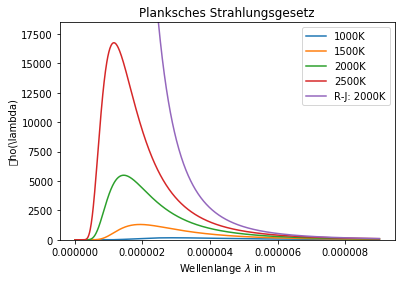

In [18]:
# Wellenlängen bis 9µm
lda = np.arange(0,9.02e-6,0.01e-6)
Temp  = (1000,1500,2000,2500)
#Plotten Planck
for T in Temp:
    plt.plot(lda,planckGesetzt(lda,T), label= str (T) + "K")
#Plotten Rayleigh-JEans
plt.plot(lda,RayleighJeans(lda, 2000), label="R-J: 2000K")
#Label usw
plt.legend()
plt.title("Planksches Strahlungsgesetz")
plt.xlabel("Wellenlange $\lambda$ in m")
plt.ylabel("\rho(\lambda)")
plt.ylim(0,18500)
plt.show()

#debug
RJ = RayleighJeans(lda,2000)

## **Aufgabe 6: Vom Planckschen Strahlungsgesetz zum Wienschen Verschiebungsgesetz**
Die obige Gleichung lässt sich umstellen zu $f (x) =g(x)$ mit den Funktionen
$f(x) = \frac{x}{5}$ und $g(x)=1-e^{-x}$. Zeichnen Sie die beiden Funktionen $f$ und $g$ mit
Python. Bestimmen Sie graphisch den $x$-Wert, für den sich die beiden Funktionen
schneiden.


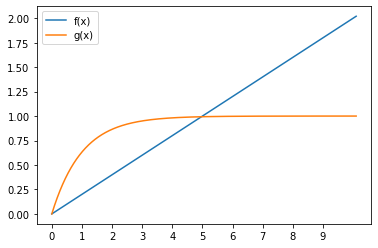

In [19]:
x = np.arange(0,10.1,0.0001) 
plt.plot(x,x/5,label="f(x)")
plt.plot(x,1-np.exp(-x), label="g(x)")
plt.legend()
plt.xticks(np.arange(0,10,1))
plt.show()

Graphisch ermittelt ist der Schnittpunkt bei knapp unter 5.

## **Aufgabe 9: Wärmekapazität**
Die Einsteinsche Theorie für die Wärmekapazität führt zu der in der Vorlesung angegebenen
Gleichung

$C_{V,m} = 3R\left(\dfrac{\Theta_E}{T}\right)^2 \dfrac{e^{-\frac{\Theta_E}{T}}}{\left(1-e^{-\frac{\Theta_E}{T}}\right)^2} $

Zeichnen Sie mit Python die molare Wärmekapazität in Abhängigkeit der Temperatur $T$
für $ 0 < T < 700$ K. Zeichnen Sie ebenfalls die klassische Wärmekapazität $C_{V,m} = 3R$ in das
Diagramm. 

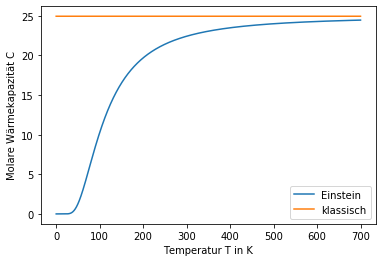

In [20]:
def EinsteinWärmeKap(ET, T):
    """ Berechnet die Einstein Wärmekapazität
        ET --  Einstein-Temperatur in K
        T -- Temperatur in Kelvin
    """
    return(3* const.R * (ET/T)**2 * (np.exp(-ET/T))/(1 - np.exp(-ET/T))**2)

#T Range bis 700k
T = np.arange(0,700,0.1)
plt.plot(T,EinsteinWärmeKap(341,T),label="Einstein")
plt.plot(T,np.full_like(T,3*const.R), label="klassisch")
plt.legend()
plt.xlabel("Temperatur T in K")
plt.ylabel("Molare Wärmekapazität C")
plt.show()
